In [1]:
import optimization as opt
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("seaborn")
params = {'legend.fontsize': '14',
          'figure.figsize': (15, 5),
          'axes.labelsize': '14',
          'axes.titlesize': '14',
          'xtick.labelsize': '12',
          'ytick.labelsize': '12'}
plt.rcParams.update(params)

## Задание №1

In [2]:
X_train = pd.read_csv("data/toxic_train.csv")
X_test = pd.read_csv("data/toxic_test.csv")
y_train = X_train["is_toxic"].values
y_test = X_test["is_toxic"].values

In [3]:
y_train = np.array([1 if i == 1 else -1 for i in y_train])
y_test = np.array([1 if i == 1 else -1 for i in y_test])

In [4]:
X_train.head(5)

,Unnamed: 0,comment_text,is_toxic
0,0,Explanation\nWhy the edits made under my usern...,False
1,1,D'aww! He matches this background colour I'm s...,False
2,2,"Hey man, I'm really not trying to edit war. It...",False
3,3,"""\nMore\nI can't make any real suggestions on ...",False
4,4,"You, sir, are my hero. Any chance you remember...",False


In [5]:
X_train["is_toxic"].mean(), X_test["is_toxic"].mean(), X_train.shape, X_test.shape

(0.3116536370795797, 0.3019442832269298, (52061, 3), (20676, 3))

In [6]:
X_train.isna().mean()

Unnamed: 0      0.0
comment_text    0.0
is_toxic        0.0
dtype: float64

In [7]:
X_train["comment_text"] = X_train["comment_text"].apply(lambda x: re.sub("[^a-zA-z0-9]", " ", x.lower()))
X_test["comment_text"] = X_test["comment_text"].apply(lambda x: re.sub("[^a-zA-z0-9]", " ", x.lower()))
X_train.head(5)

,Unnamed: 0,comment_text,is_toxic
0,0,explanation why the edits made under my userna...,False
1,1,d aww he matches this background colour i m s...,False
2,2,hey man i m really not trying to edit war it...,False
3,3,more i can t make any real suggestions on im...,False
4,4,you sir are my hero any chance you remember...,False


## Задание №2

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
vectorizer = CountVectorizer(lowercase=True, min_df=120)
X_train_v = vectorizer.fit_transform(X_train["comment_text"])
X_test_v = vectorizer.transform(X_test["comment_text"])

In [10]:
X_train_v.shape, X_test_v.shape

((52061, 2032), (20676, 2032))

## Задание №3
1. зависимость значения функции потерь от реального времени работы метода
2. зависимость значения функции потерь от итерации метода (эпохи в случае стохастического варианта)
3. зависимость точности (accuracy) от реального времени работы метода
4. зависимость точности (accuracy) итерации метода (эпохи в случае стохастического варианта)

### Пункт 1

In [11]:
from itertools import accumulate
from matplotlib.ticker import StrMethodFormatter

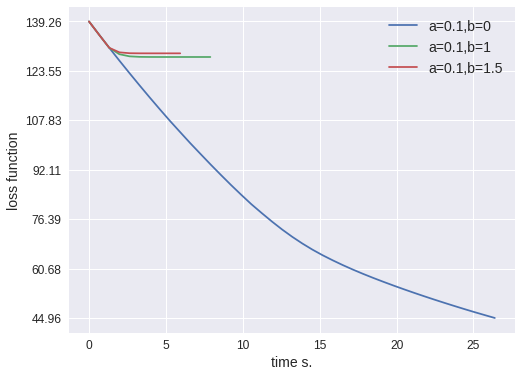

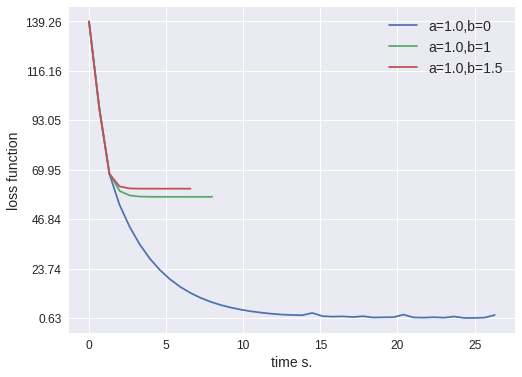

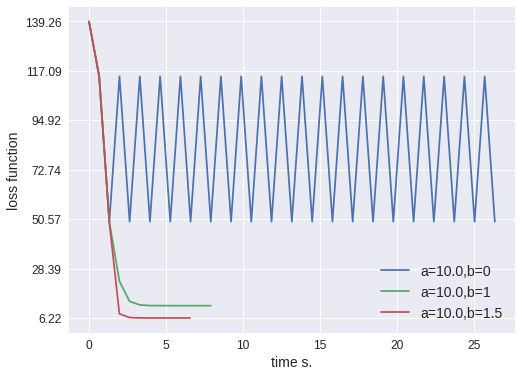

In [12]:
step_alpha = np.logspace(-1, 1, 3)
step_beta = [0, 1, 1.5]

for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        model = opt.GDClassifier(step_alpha=a, step_beta=b, l2_coef=0.1, max_iter=40, tolerance=1e-6)
        history = model.fit(X_train_v, y_train, trace=True)
        plt.plot(list(accumulate(history["time"])), history["func"], label=f"a={a},b={b}")
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        plt.ylabel("loss function")
        plt.xlabel("time s.")
        min_func = min(*history["func"], min_func)
        max_func = max(*history["func"], max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend()
    fig.savefig(f"./pictures/task_3/sub_1/fig_a_{a}_b_{b}.pdf")
    plt.show()

### Пункт 2

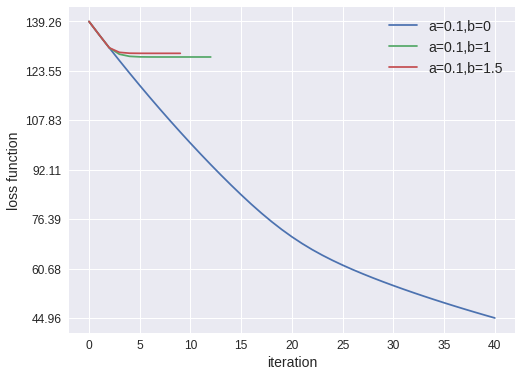

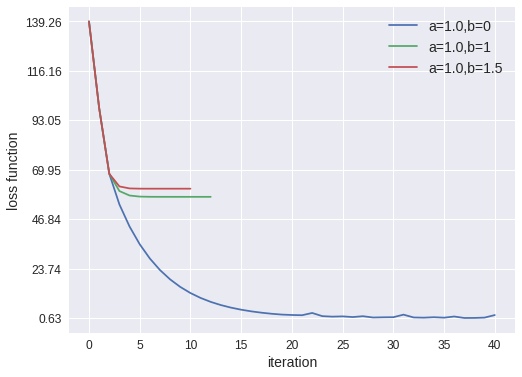

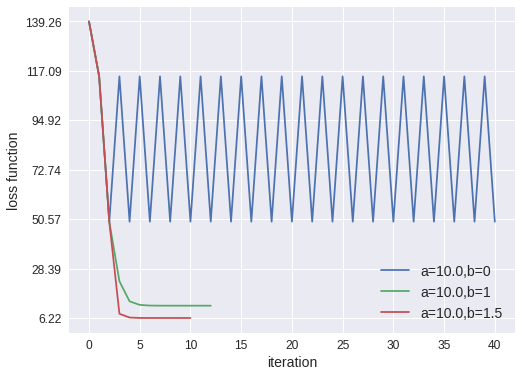

In [13]:
step_alpha = np.logspace(-1, 1, 3)
step_beta = [0, 1, 1.5]
max_iter = 40
for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        model = opt.GDClassifier(step_alpha=a, step_beta=b, l2_coef=0.1, max_iter=max_iter, tolerance=1e-6)
        history = model.fit(X_train_v, y_train, trace=True)
        plt.plot(np.arange(0, len(history["func"])), history["func"], label=f"a={a},b={b}")
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        plt.ylabel("loss function")
        plt.xlabel("iteration")
        min_func = min(*history["func"], min_func)
        max_func = max(*history["func"], max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend()
    fig.savefig(f"./pictures/task_3/sub_2/fig_a_{a}_b_{b}.pdf")
    plt.show()

### Пункт 3

In [14]:
from sklearn.metrics import accuracy_score as asc

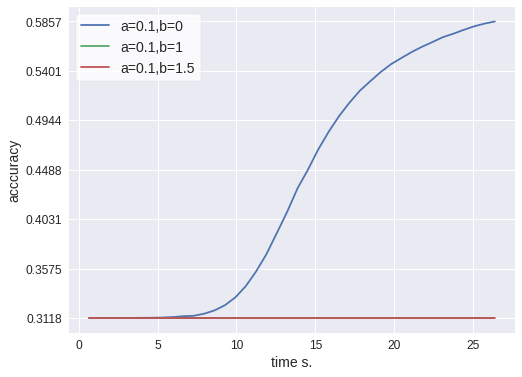

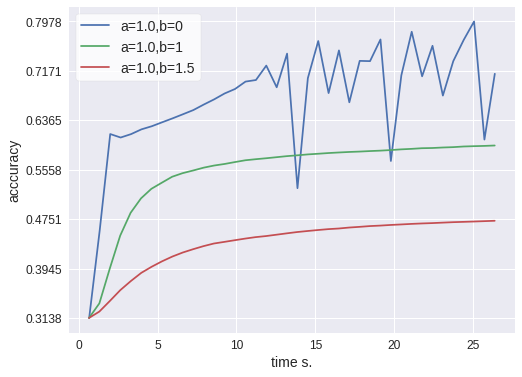

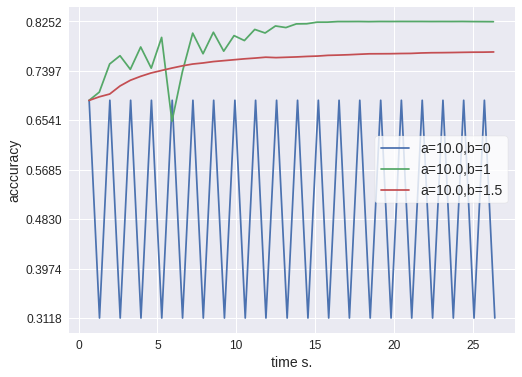

In [15]:
step_alpha = np.logspace(-1, 1, 3)
step_beta = [0, 1, 1.5]
max_iter = 40
for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        x_values = []
        times = []
        w_0 = np.ones(X_train_v.shape[1])
        for i in range(max_iter):
            model = opt.GDClassifier(step_alpha=a/(i+1)**b, step_beta=b,
                                     l2_coef=0.1, max_iter=1, tolerance=1e-6)
            history = model.fit(X_train_v, y_train, trace=True, w_0=w_0)
            w_0 = model.get_weights()
            x_values.append(asc(model.predict(X_train_v), y_train))
            times.append(history["time"][-1])

        plt.plot(list(accumulate(times)), x_values, label=f"a={a},b={b}")
        plt.ylabel("acccuracy")
        plt.xlabel("time s.")

        min_func = min(*x_values, min_func)
        max_func = max(*x_values, max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend(frameon=True,facecolor="white")
    #fig.savefig(f"./pictures/task_3/sub_3/fig_a_{a}_b_{b}.pdf")
    plt.show()

### Пункт 4

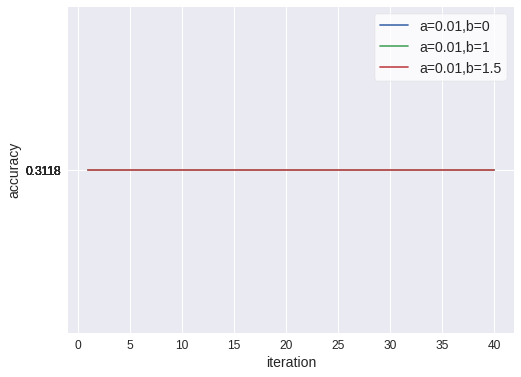

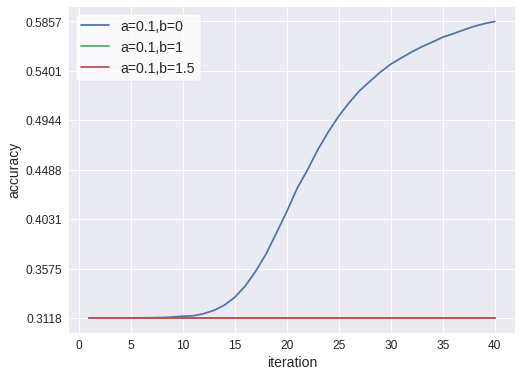

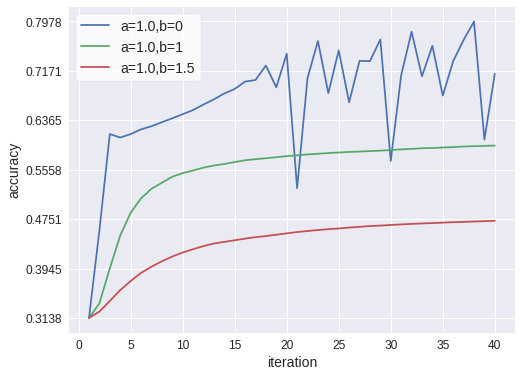

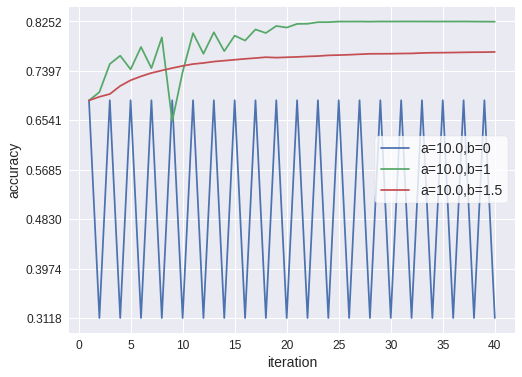

In [16]:
step_alpha = np.logspace(-2, 1, 4)
step_beta = [0, 1, 1.5]
max_iter = 40
for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        x_values = []
        w_0 = np.ones(X_train_v.shape[1])
        for i in range(max_iter):
            model = opt.GDClassifier(step_alpha=a/(i+1)**b, step_beta=b,
                                     l2_coef=0.1, max_iter=1, tolerance=1e-7)
    
            history = model.fit(X_train_v, y_train, trace=True, w_0=w_0)
            w_0 = model.get_weights()
            x_values.append(asc(model.predict(X_train_v), y_train))

        plt.plot(np.arange(1,len(x_values)+1), x_values, label=f"a={a},b={b}")
        plt.ylabel("accuracy")
        plt.xlabel("iteration")

        min_func = min(*x_values, min_func)
        max_func = max(*x_values, max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend(frameon=True,facecolor="white")
    fig.savefig(f"./pictures/task_3/sub_4/fig_a_{a}_b_{b}.pdf")
    plt.show()

### Для нормы весов

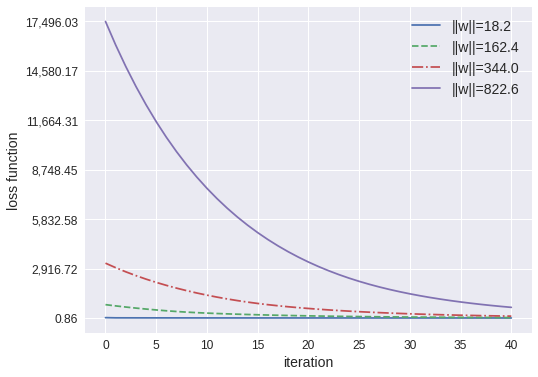

In [17]:
min_func = float("inf")
max_func = float("-inf")
fig = plt.figure(figsize=(8, 6))
rand = [(0.7, 0), (5, 2), (10, 5), (30, 3)]
ls = ["-", "--", "-.", "-"]
for r, ls in zip(rand, ls):
    a, b = r[0],r[1]
    np.random.seed(42)
    w = b + (a-b)*np.random.rand(X_train_v.shape[1])
    model = opt.GDClassifier(step_alpha=0.8, step_beta=0, l2_coef=0.05,
                             max_iter=40, tolerance=1e-7)
    history = model.fit(X_train_v, y_train, trace=True, w_0=w)
    plt.plot(np.arange(len(history["func"])), history["func"], label=f"||w||={np.linalg.norm(w):.01f}", ls=ls)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.ylabel("loss function")
    plt.xlabel("iteration")
    min_func = min(*history["func"], min_func)
    max_func = max(*history["func"], max_func)
    plt.yticks(np.linspace(min_func, max_func, 7))
plt.legend()
fig.savefig(f"./pictures/task_3/weights.pdf")
plt.show()

## Задание №4

1. параметр размера шага step_alpha
2. параметр размера шага step_beta
3. размер подвыборки batch_size
4. начального приближения

### Пункт 1,2

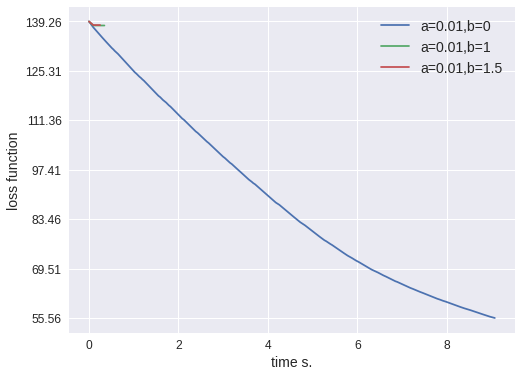

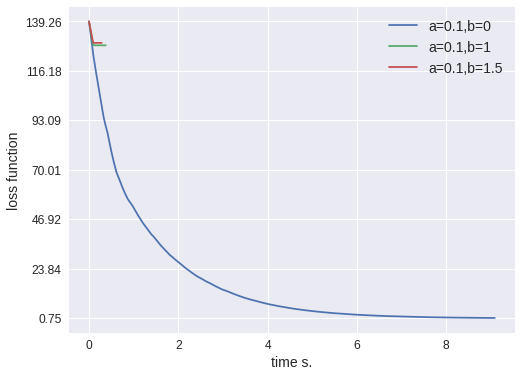

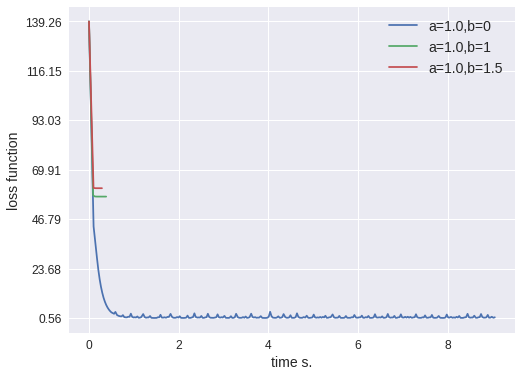

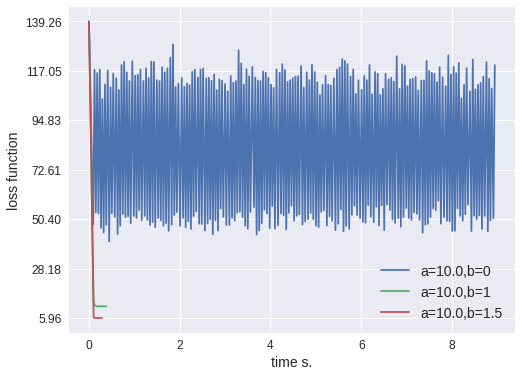

In [18]:
step_alpha = np.logspace(-2, 1, 4)
step_beta = [0, 1, 1.5]

for i, a in enumerate(step_alpha):
    fig = plt.figure(figsize=(8, 6))
    min_func = float("inf")
    max_func = float("-inf")
    for j, b in enumerate(step_beta):
        model = opt.SGDClassifier(batch_size=5000, step_alpha=a, step_beta=b,
                                  l2_coef=0.1, max_iter=300, tolerance=1e-7)
        history = model.fit(X_train_v, y_train, trace=True,log_freq=0.3)
        plt.plot(list(accumulate(history["time"])), history["func"], label=f"a={a},b={b}")
        plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
        plt.ylabel("loss function")
        plt.xlabel("time s.")
        min_func = min(*history["func"], min_func)
        max_func = max(*history["func"], max_func)
        plt.yticks(np.linspace(min_func, max_func, 7))
    plt.legend()
    fig.savefig(f"./pictures/task_4/sub_1/fig_a_{a}_b_{b}.pdf")
    plt.show()

### Пункт 3

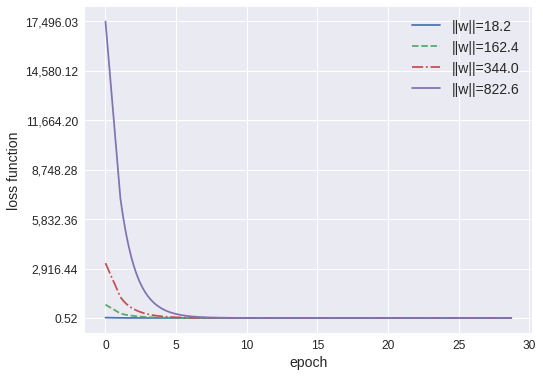

In [19]:
min_func = float("inf")
max_func = float("-inf")
fig = plt.figure(figsize=(8, 6))
rand = [(0.7, 0), (5, 2), (10, 5), (30, 3)]
ls = ["-", "--", "-.", "-"]
for r, ls in zip(rand, ls):
    a, b = r[0], r[1]
    np.random.seed(42)
    w = b + (a-b)*np.random.rand(X_train_v.shape[1])
    model = opt.SGDClassifier(batch_size=5000, step_alpha=0.8, step_beta=0, l2_coef=0.05,
                              max_iter=300, tolerance=1e-7, random_seed=153)
    history = model.fit(X_train_v, y_train, trace=True, w_0=w)
    plt.plot(history["epoch_num"], history["func"], label=f"||w||={np.linalg.norm(w):.01f}", ls=ls)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.ylabel("loss function")
    plt.xlabel("epoch")
    min_func = min(*history["func"], min_func)
    max_func = max(*history["func"], max_func)
    plt.yticks(np.linspace(min_func, max_func, 7))
plt.legend()
fig.savefig(f"./pictures/task_4/weights.pdf")
plt.show()

### Пункт 4

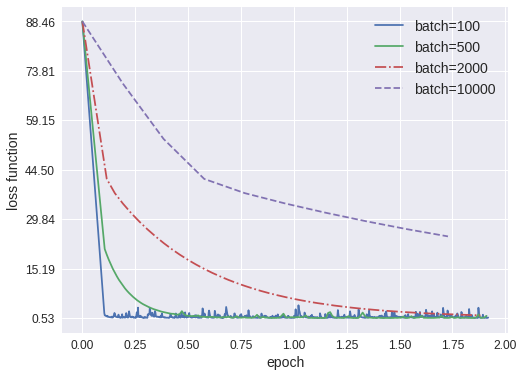

In [20]:
min_func = float("inf")
max_func = float("-inf")
fig = plt.figure(figsize=(8, 6))
batchs = [100, 500, 2000, 10000]
ls = ["-", "-", "-.", "--"]
for b, ls in zip(batchs, ls):
    model = opt.SGDClassifier(batch_size=b, step_alpha=0.8, step_beta=0, l2_coef=0.05,
                              max_iter=100000//b, tolerance=1e-7, random_seed=153)
    history = model.fit(X_train_v, y_train, trace=True,log_freq=0.1)
    plt.plot(history["epoch_num"], history["func"], label=f"batch={b}", ls=ls)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.2f}'))
    plt.ylabel("loss function")
    plt.xlabel("epoch")
    min_func = min(*history["func"], min_func)
    max_func = max(*history["func"], max_func)
    plt.yticks(np.linspace(min_func, max_func, 7))
plt.legend()
fig.savefig(f"./pictures/task_4/fig_batch.pdf")
plt.show()

In [25]:
vectorizer = CountVectorizer(lowercase=True, min_df=50)
X_train_v = vectorizer.fit_transform(X_train["comment_text"])
X_test_v = vectorizer.transform(X_test["comment_text"])

In [26]:
X_train_v.shape, X_test_v.shape

((52061, 3926), (20676, 3926))

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score as acs

In [35]:
step_alpha = np.linspace(0.5, 1, 5)
step_beta = [0]  # best
l2 = np.linspace(0.01, 0.3, 3)
scores = []
for a in step_alpha:
    for l in l2:
        cv = StratifiedKFold(n_splits=2, shuffle=True)
        score = []
        for train_index, test_index in cv.split(X_train_v, y_train):
            model = opt.SGDClassifier("binary_logistic", 2000, a, 0,
                                      tolerance=1e-5, max_iter=400, l2_coef=l)
            model.fit(X_train_v[train_index], y_train[train_index])
            y_pred = model.predict(X_train_v[test_index])
            score.append(acs(y_pred, y_train[test_index]))
        print(f"{a}, {l}, {score}")
        scores.append([score, a, l])

0.5, 0.01, [0.8286274057854097, 0.8275451402228198]
0.5, 0.155, [0.8095732011832046, 0.8105647330003841]
0.5, 0.3, [0.7884829626214898, 0.7787552823665002]
0.625, 0.01, [0.8423802389458722, 0.8451018056089128]
0.625, 0.155, [0.8028120318082287, 0.7887437572032271]
0.625, 0.3, [0.7438438784526142, 0.7804840568574721]
0.75, 0.01, [0.8530982290346126, 0.8436035343834037]
0.75, 0.155, [0.7788790288502171, 0.7787552823665002]
0.75, 0.3, [0.7259805616380469, 0.7592393392239724]
0.875, 0.01, [0.8547116899081864, 0.8389550518632347]
0.875, 0.155, [0.744612193154316, 0.755512869765655]
0.875, 0.3, [0.764050555107372, 0.696772954283519]
1.0, 0.01, [0.8510621950751027, 0.8358816749903957]


KeyboardInterrupt: 

In [56]:
model = opt.SGDClassifier(batch_size=2000, step_alpha=0.5, step_beta=0,
                          tolerance=1e-7, max_iter=1500, l2_coef=0.01)
model.fit(X_train_v, y_train)

In [57]:
y_pred_test = model.predict(X_test_v)
y_pred_train = model.predict(X_train_v)
acs(y_pred_test, y_test), acs(y_pred_train, y_train)

(0.8354614045269878, 0.8650813468815428)

In [58]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /home/tyskiy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/tyskiy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/tyskiy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [60]:
# https://webdevblog.ru/podhody-lemmatizacii-s-primerami-v-python/
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [61]:
X_train.head(5)

,Unnamed: 0,comment_text,is_toxic
0,0,explanation why the edits made under my userna...,False
1,1,d aww he matches this background colour i m s...,False
2,2,hey man i m really not trying to edit war it...,False
3,3,more i can t make any real suggestions on im...,False
4,4,you sir are my hero any chance you remember...,False


In [74]:
lemmatizer = WordNetLemmatizer()
X_train["comment_text"] = X_train["comment_text"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]))
X_test["comment_text"] = X_test["comment_text"].apply(
    lambda x: " ".join([lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]))

### Экперимент

In [137]:
def del_letters(seq):
    return " ".join([w for w in seq.split(" ") if len(w) > 2])

In [138]:
X_train_exp = X_train["comment_text"].apply(lambda x: del_letters(x))
X_test_exp = X_test["comment_text"].apply(lambda x: del_letters(x))
X_train_exp[:10]

0    explanation why the edits make under username ...
1    aww match this background colour seemingly stu...
2    hey man really not try edit war just that this...
3    more can make any real suggestion improvement ...
4    you sir hero any chance you remember what page...
5      congratulation from well use the tool well talk
6               cocksucker before you piss around work
7    your vandalism the matt shirvington article ha...
8    sorry the word nonsense offensive you anyway n...
9    alignment this subject and which contrary thos...
Name: comment_text, dtype: object

In [149]:
vectorizer = CountVectorizer(lowercase=True, min_df=50,stop_words="english")
X_train_v_lem = vectorizer.fit_transform(X_train["comment_text"])
X_test_v_lem = vectorizer.transform(X_test["comment_text"])

In [150]:
X_train_v_lem.shape, X_test_v_lem.shape

((52061, 3092), (20676, 3092))

In [151]:
model = opt.SGDClassifier(batch_size=2000, step_alpha=0.8, step_beta=0,
                          tolerance=1e-7, max_iter=1500, l2_coef=0.01)
model.fit(X_train_v_lem, y_train)

In [152]:
y_pred_test = model.predict(X_test_v_lem)
y_pred_train = model.predict(X_train_v_lem)
acs(y_pred_test, y_test), acs(y_pred_train, y_train)

(0.8595473012188044, 0.8743205086341023)

In [153]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [154]:
vectorizer = TfidfVectorizer(lowercase=True, min_df=50, stop_words="english")
X_train_tf_lem = vectorizer.fit_transform(X_train["comment_text"])
X_test_tf_lem = vectorizer.transform(X_test["comment_text"])

In [111]:
step_alpha = np.linspace(0.75, 1, 3)
step_beta = 0  # best
l2 = np.linspace(0.007, 0.015, 3)
scores = []
for a in step_alpha:
    for l in l2:
        cv = StratifiedKFold(n_splits=2, shuffle=True)
        score = []
        for train_index, test_index in cv.split(X_train_tf_lem, y_train):
            model = opt.SGDClassifier("binary_logistic", 2000, a, 0,
                                      tolerance=1e-5, max_iter=800, l2_coef=l)
            model.fit(X_train_tf_lem[train_index], y_train[train_index])
            y_pred = model.predict(X_train_tf_lem[test_index])
            score.append(acs(y_pred, y_train[test_index]))
        print(f"{a}, {l}, {score}")
        scores.append([score, a, l])

0.75, 0.007, [0.8233644500787523, 0.8219746446407991]
0.75, 0.011, [0.8154892243863087, 0.8155589704187476]
0.75, 0.015, [0.8121854711689909, 0.8124855935459085]
0.875, 0.007, [0.8219046521455188, 0.8209373799462159]
0.875, 0.011, [0.8154123929161384, 0.8155589704187476]
0.875, 0.015, [0.8116092351427144, 0.8126008451786401]
1.0, 0.007, [0.8217509892051784, 0.8209757971571264]
1.0, 0.011, [0.8151434827705428, 0.8154821359969266]
1.0, 0.015, [0.8130690330759479, 0.8132539377641184]


In [155]:
model = opt.SGDClassifier(batch_size=2000, step_alpha=0.8, step_beta=0,
                          tolerance=1e-7, max_iter=1800, l2_coef=0.004)
model.fit(X_train_tf_lem, y_train)

In [156]:
y_pred_test = model.predict(X_test_tf_lem)
y_pred_train = model.predict(X_train_tf_lem)
acs(y_pred_test, y_test), acs(y_pred_train, y_train)

(0.850116076610563, 0.8317934730412401)

In [170]:
vectorizer = CountVectorizer(lowercase=True, min_df=50, ngram_range=[1, 2], stop_words="english")
X_train_v_lem_2g = vectorizer.fit_transform(X_train["comment_text"])
X_test_v_lem_2g = vectorizer.transform(X_test["comment_text"])

In [171]:
X_train_v_lem_2g.shape

(52061, 4031)

### n-gramm

In [174]:
model = opt.SGDClassifier(batch_size=2000, step_alpha=0.7, step_beta=0,
                          tolerance=1e-7, max_iter=1500, l2_coef=0.01)
model.fit(X_train_v_lem_2g, y_train)

In [175]:
y_pred_test = model.predict(X_test_v_lem_2g)
y_pred_train = model.predict(X_train_v_lem_2g)
acs(y_pred_test, y_test), acs(y_pred_train, y_train)

(0.8592087444379958, 0.8747430898369221)